# Information Retrieval

Bag of Words and TF-IDF

## Library Imports

In [1]:
# Import Os to get to the root directory
import os
import sys


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

import warnings
warnings.filterwarnings("ignore")

# Import packages

import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import string # for punctuation
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\laman\\Desktop\\datascience_project-master\\libraries\\corpus.py'>

## Data Preprocessing

In [2]:
dataset = pdf2text.get_dataset()

In [3]:
dataset.keys()

dict_keys(['0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Alluva', 'Ample!', 'ArkIO', 'BasicAttentionToken', 'Binance', 'Bitcoin', 'BitcoinGold', 'BitStash', 'Budbo', 'Bytecoin', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'Dash', 'Decentraland', 'Digix', 'Enjin', 'EtherAce', 'Ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'Golem', 'GuaranteedEntranceToken', 'GXChain', 'ICON', 'IOTA', 'KwattCoin', 'Latoken', 'MoneroV', 'Neox', 'Oxcert', 'RippleProtocol', 'SDUSD', 'SnipCoin', 'Solve', 'Steem', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash'])

In [4]:
len(dataset.keys())

62

In [6]:
makeSentences = True
corpora = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True,makeSentences=makeSentences, 
                                 removeURL=True, removeChar=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaning: 0chain
Cleaning: 1World
Cleaning: 1x2Coin
Cleaning: AB-CHAIN
Cleaning: ABCC
Cleaning: ABLE
Cleaning: Absolute
Cleaning: ACE
Cleaning: Achain
Cleaning: AcreCoin
Cleaning: Actinium
Cleaning: AcuteAngle
Cleaning: Adamant
Cleaning: AdBank
Cleaning: AdChainRegistry
Cleaning: AdCoin
Cleaning: Adhive
Cleaning: Aditus
Cleaning: Adshares
Cleaning: Alluva
Cleaning: Ample!
Cleaning: ArkIO
Cleaning: BasicAttentionToken
Cleaning: Binance
Cleaning: Bitcoin
Cleaning: BitcoinGold
Cleaning: BitStash
Cleaning: Budbo
Cleaning: Bytecoin
Cleaning: Cosmos
Cleaning: CryptoNote
Cleaning: DaiStableCoinSystem
Cleaning: Dash
Cleaning: Decentraland
Cleaning: Digix
Cleaning: Enjin
Cleaning: EtherAce
Cleaning: Ethereum
Cleaning: EthereumClassic
Cleaning: Giant
Cleaning: GiveCoin
Cleaning: Golem
Cleaning: GuaranteedEntranceToken
Cleaning: GXChain
Cleaning: ICON
Cleaning: IOTA
Cleaning: KwattCoin
Cleaning: Latoken
Cleaning: MoneroV
Cleaning: Neox
Cleaning: Oxcert
Cleaning: RippleProtocol
Cleaning: SDUSD
Cle

In [7]:
corpora.keys()

dict_keys(['0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Alluva', 'Ample!', 'ArkIO', 'BasicAttentionToken', 'Binance', 'Bitcoin', 'BitcoinGold', 'BitStash', 'Budbo', 'Bytecoin', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'Dash', 'Decentraland', 'Digix', 'Enjin', 'EtherAce', 'Ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'Golem', 'GuaranteedEntranceToken', 'GXChain', 'ICON', 'IOTA', 'KwattCoin', 'Latoken', 'MoneroV', 'Neox', 'Oxcert', 'RippleProtocol', 'SDUSD', 'SnipCoin', 'Solve', 'Steem', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash'])

## BAG OF WORDS

A popular and simple method of feature extraction with text data is called the bag-of-words model of text.

# 0chain

In [8]:
corpora["0chain"]

['chain whitepaper v pdf chain fast secure scalable free blockchain tailor highperformance zerotrust decentralize storage whitepaper v last update mar ',
 'subject far review update saswata basu thomas austin siva dirisala chain team table content introduction motivation executive summary ',
 'introduction chain ',
 'product ',
 'chainnet ',
 'box ',
 'wallet ',
 'chain architecture ',
 'consensus protocol ',
 'storage protocol ',
 'split key protocol ',
 'token reward protocol ',
 'governance protocol ',
 'protocol ',
 'appendix appendix team appendix understand chain finality appendix consensus protocol appendix storage token reward protocol appendix split key protocol motivation start develop chain july driven idea redefine cloud context privacy transparency user control data ',
 'dove deeper development process identify number critical unresolved issue cryptocurrency space token security token valuation metric governance token inflation ',
 'address aforementioned issue chose condu

In [16]:
# Start tokenizing your dataset
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)

if makeSentences:
    #############################################
    # Tokenization on sentences
    tokens = [tokenizer.tokenize(s) for s in corpora["0chain"]]
    # Flatten the list
    tokens = np.reshape(np.concatenate(tokens), -1)
    #############################################
else:
    #############################################
    # Tokenization on whole corpus (no sentences)
    tokens = tokenizer.tokenize(corpora["0chain"])
    #############################################



print('We have', len(tokens), 'words in total. \n')
print(tokens[5:10])


We have 3947 words in total. 

['fast' 'secure' 'scalable' 'free' 'blockchain']


In [17]:
from nltk.probability import FreqDist

# Turn corpus into np before unnest the list
 # numpy can handle text as well

fdist = FreqDist(tokens)

fdist.most_common(5)

[('time', 85),
 ('block', 74),
 ('protocol', 66),
 ('chain', 62),
 ('finality', 62)]

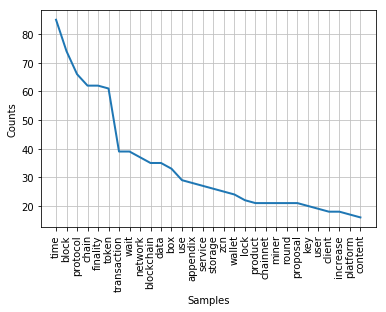

In [18]:
import matplotlib.pyplot as plt


fdist.plot(30,cumulative=False)
plt.show()

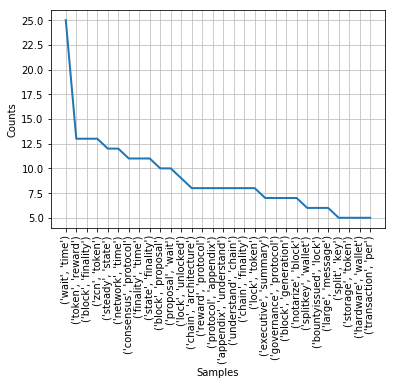

In [19]:
from nltk import bigrams, ngrams
bigrams_tokens = bigrams(tokens)
fdist_bigrams = FreqDist(list(bigrams_tokens))
fdist_bigrams.plot(30,cumulative=False)
plt.show()

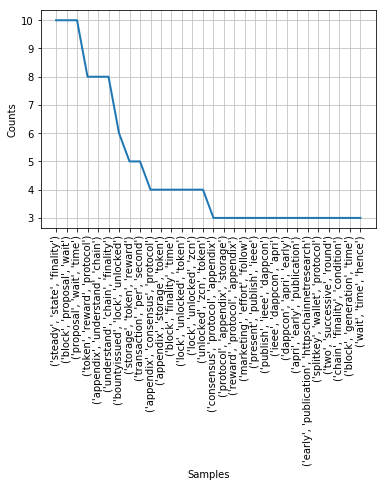

In [20]:
# n=3
trigrams_tokens = ngrams(tokens, 3)
fdist_trigrams = FreqDist(list(trigrams_tokens))
fdist_trigrams.plot(30,cumulative=False)
plt.show()

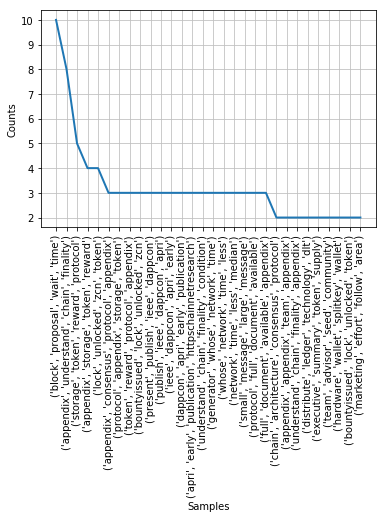

In [21]:
# n=4
grams4_tokens = ngrams(tokens, 4)
fdist_grams4 = FreqDist(list(grams4_tokens))
fdist_grams4.plot(30,cumulative=False)
plt.show()

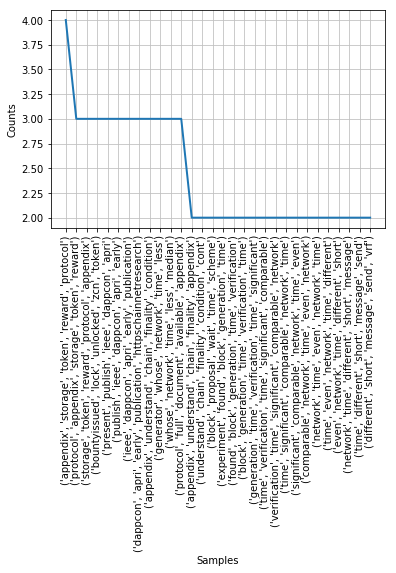

In [23]:
# n=5
grams5_tokens = ngrams(tokens, 5)
fdist_grams5 = FreqDist(list(grams5_tokens))
fdist_grams5.plot(30,cumulative=False)
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x000001E12F8DC908>>,
        vocabulary=None)

In [27]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(tokens)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

# see final the clean data
print (train_data_features.shape)

(3947, 1206)


In [28]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(corpora["0chain"])
bag_of_words = count_vec.transform(corpora["0chain"])

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['ability', 'able', 'absorbed', 'abstract', 'accelerator', 'accepted', 'access', 'accommodate', 'accomplish', 'accordingly', 'account', 'accountability', 'accumulate', 'accurate', 'achieve', 'acquisition', 'act', 'activate', 'actor', 'ad', 'addition', 'additional', 'additionally', 'additionremoval', 'address', 'adequately', 'administration', 'adoption', 'advanced', 'advantage', 'advisor', 'aforementioned', 'agree', 'agrees', 'aim', 'algorithmic', 'alienate', 'allocate', 'allocation', 'allow', 'allows', 'amiss', 'anonymous', 'api', 'app', 'appendix', 'apple', 'application', 'approach', 'apri', 'arbitrarily', 'architect', 'architecture', 'area', 'argue', 'arrive', 'art', 'article', 'artist', 'aspect', 'asset', 'assetbacked', 'assetbased', 'assigns', 'associate', 'assume', 'assumes', 'assumption', 'assure', 'ata', 'atoz', 'attack', 'attestation', 'austin', 'authentic', 'authentication', 'authenticator', 'availability', 'available', 'average', 'aws', 'baa', 'background', 'ba

In [29]:
#Vocabulary and vocabulary ID

print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 1130
Vocabulary content:
 {'chain': 146, 'whitepaper': 1111, 'pdf': 706, 'fast': 390, 'secure': 878, 'scalable': 867, 'free': 416, 'blockchain': 101, 'tailor': 983, 'highperformance': 455, 'zerotrust': 1128, 'decentralize': 258, 'storage': 956, 'update': 1061, 'mar': 589, 'subject': 963, 'far': 388, 'review': 840, 'saswata': 865, 'basu': 92, 'thomas': 998, 'austin': 73, 'siva': 919, 'dirisala': 293, 'team': 987, 'table': 981, 'content': 212, 'introduction': 520, 'motivation': 632, 'executive': 365, 'summary': 973, 'product': 751, 'chainnet': 147, 'box': 113, 'wallet': 1103, 'architecture': 52, 'consensus': 206, 'protocol': 767, 'split': 937, 'key': 534, 'token': 1009, 'reward': 841, 'governance': 433, 'appendix': 45, 'understand': 1042, 'finality': 398, 'start': 946, 'develop': 281, 'july': 533, 'driven': 312, 'idea': 465, 'redefine': 803, 'cloud': 170, 'context': 214, 'privacy': 743, 'transparency': 1024, 'user': 1068, 'control': 218, 'data': 254, 'dove': 308, 'deeper

In [30]:
import collections, re
text_1 = corpora["0chain"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_1]
bagsofwords[0]

Counter({'chain': 2,
         'whitepaper': 2,
         'v': 2,
         'pdf': 1,
         'fast': 1,
         'secure': 1,
         'scalable': 1,
         'free': 1,
         'blockchain': 1,
         'tailor': 1,
         'highperformance': 1,
         'zerotrust': 1,
         'decentralize': 1,
         'storage': 1,
         'last': 1,
         'update': 1,
         'mar': 1})

In [31]:
bagsofwords[1]

Counter({'subject': 1,
         'far': 1,
         'review': 1,
         'update': 1,
         'saswata': 1,
         'basu': 1,
         'thomas': 1,
         'austin': 1,
         'siva': 1,
         'dirisala': 1,
         'chain': 1,
         'team': 1,
         'table': 1,
         'content': 1,
         'introduction': 1,
         'motivation': 1,
         'executive': 1,
         'summary': 1})

In [32]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'time': 85, 'block': 74, 'protocol': 66, 'chain': 62, 'finality': 62, 'token': 61, 'transaction': 39, 'wait': 39, 'network': 37, 'blockchain': 35, 'data': 35, 'box': 33, 'use': 29, 'appendix': 28, 'service': 27, 'storage': 26, 'zcn': 25, 'wallet': 24, 'lock': 22, 'product': 21, 'chainnet': 21, 'miner': 21, 'round': 21, 'proposal': 21, 'key': 20, 'user': 19, 'client': 18, 'increase': 18, 'platform': 17, 'content': 16, 'reward': 16, 'process': 16, 'store': 16, 'message': 16, 'state': 15, 'solution': 15, 'issue': 14, 'blobbers': 14, 'value': 14, 'provide': 14, 'need': 14, 'one': 14, 'market': 13, 'device': 13, 'base': 13, 'follow': 13, 'secure': 12, 'architecture': 12, 'consensus': 12, 'governance': 12, 'address': 12, 'result': 12, 'node': 12, 'two': 12, 'send': 12, 'work': 12, 'blobber': 12, 'steady': 12, 'team': 11, 'start': 11, 'security': 11, 'today': 11, 'per': 11, 'public': 11, 'share': 11, 'expect': 11, 'large': 11, 'small': 11, 'tr': 11, 'verification': 10, 'via': 10, 'en

In [33]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array(corpora["0chain"])
bag = count.fit_transform(docs)
print(bag)

  (0, 624)	1
  (0, 1125)	1
  (0, 574)	1
  (0, 1012)	1
  (0, 270)	1
  (0, 1204)	1
  (0, 482)	1
  (0, 1040)	1
  (0, 111)	1
  (0, 438)	1
  (0, 916)	1
  (0, 927)	1
  (0, 409)	1
  (0, 754)	1
  (0, 1181)	2
  (0, 157)	2
  (1, 1029)	1
  (1, 384)	1
  (1, 670)	1
  (1, 549)	1
  (1, 223)	1
  (1, 1038)	1
  (1, 1045)	1
  (1, 306)	1
  (1, 973)	1
  :	:
  (323, 687)	1
  (324, 943)	1
  (324, 393)	1
  (324, 1067)	1
  (324, 1090)	1
  (324, 644)	1
  (324, 976)	1
  (324, 573)	1
  (324, 218)	1
  (324, 1064)	1
  (324, 504)	1
  (324, 42)	1
  (324, 797)	1
  (324, 816)	1
  (324, 157)	1
  (325, 86)	3
  (325, 320)	3
  (325, 442)	3
  (325, 993)	3
  (325, 52)	9
  (325, 890)	3
  (325, 1069)	3
  (325, 816)	9
  (325, 217)	3
  (325, 1012)	3


## Visualization / Outcome

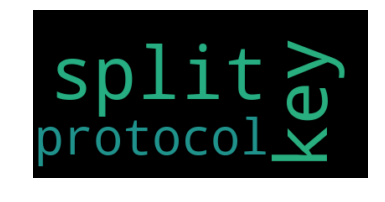

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(corpora['0chain'][10]) # We need to work on whole corpus and not sentences corpus
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
#wordcloud = WordCloud(width = 800, height = 800, 
#                background_color ='white', 
#                stopwords = stopwords, 
#                min_font_size = 10).generate(tokens) 
  
# plot the WordCloud image                        
#plt.figure(figsize = (8, 8), facecolor = None) 
#plt.imshow(wordcloud) 
#plt.axis("off") 
#plt.tight_layout(pad = 0)
#plt.show()

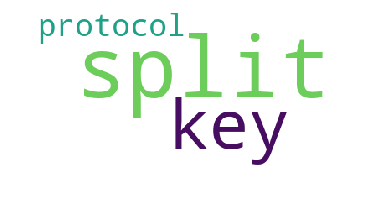

In [49]:
text_1 = corpora["0chain"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(text_1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TFI-IDF

In [ ]:
from collections import Counter, defaultdict
import pandas as pd
import pandas as pd
temp = []
for h, c in corpora.items():
    temp.append(pd.DataFrame.from_dict(Counter(c), orient='index'))
#     pd.DataFrame.from_dict(Counter(corpus['HP1']), orient='index')

term_count = pd.concat(temp, axis=1)
term_count.reset_index(inplace=True)
term_count.columns = ["token",'0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Ample!', 'BasicAttentionToken', 'Binance', 'bitcoin', 'BitcoinGold', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'dash', 'EtherAce', 'ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'GuaranteedEntranceToken', 'IOTA', 'KwattCoin', 'oxcert', 'RippleProtocol', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash']
term_count['sum'] = term_count.sum(axis = 1, skipna = True) 
term_count.fillna(0, inplace=True)
term_count.sort_values('sum', ascending=False, inplace=False).head(20)

In [ ]:
TF = term_count.iloc[:,2:9]/(term_count.iloc[:,2:9].sum(axis=0))

In [ ]:
IDF = np.log(7/((term_count.iloc[:,2:9]/term_count.iloc[:,2:9]).sum(axis=1)))

In [ ]:
TFIDF = TF.apply(lambda col: col*IDF)
TFIDF = pd.concat([term_count.iloc[:,:2],TFIDF], axis=1)
TFIDF['sum'] = TFIDF.sum(axis=1)

In [ ]:
TFIDF.sort_values('sum', ascending=False).head(10)

In [ ]:
toPlot = TFIDF.sort_values('sum', ascending=False).head(10)
statistic = toPlot.iloc[:,2:9]
statistic.set_index(toPlot['token1'] + ' ' + toPlot['token2'], inplace=True)

toPlot = statistic.T
plt.figure(figsize=(18,6))
for c in toPlot:
    plt.plot(toPlot[c], label=toPlot[c].name)
plt.legend()
plt.show()

## Method Application